## Thera Bank Personal Loan Campaign Data Description:

The dataset contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

## Domain:
Banking

## Context:
This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget.

### Attribute Information:
<pre>
ID: Customer ID
Age: Customer's age in completed years
Experience: #years of professional experience
Income: Annual income of the customer ($000)
ZIP Code: Home Address ZIP code.
Family: Family size of the customer
CCAvg: Avg. spending on credit cards per month ($000)
Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
Mortgage: Value of house mortgage if any. ($000)
Personal Loan: Did this customer accept the personal loan offered in the last campaign?
Securities Account: Does the customer have a securities account with the bank?
CD Account: Does the customer have a certificate of deposit (CD) account with the bank?
Online: Does the customer use internet banking facilities?
Credit card: Does the customer use a credit card issued by the bank?
</pre>

### Learning Outcomes:
<pre>
 Exploratory Data Analysis
 Preparing the data to train a model
 Training and making predictions using a classification model  Modelevaluation
</pre>

### Objective:
The classification goal is to predict the likelihood of a liability customer buying personal loans.


1. [Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation](#1)
2. [EDA: Study the data distribution in each attribute and target variable, share your findings](#2)
3. [Split the data into training and test set in the ratio of 70:30 respectively](#3)
4. [Use Logistic Regression model to predict the number of a customers buying personal loans. Print all the metrics related for evaluating the model performance](#4)
5. [Give your reasoning on how can the model perform better?](#5)
6. [Give Business understanding of your model](#6)

https://github.com/GreatLearningAIML1/gl-pgp-aiml-uta-intl-may20-bunty-sunbird/tree/master/project/TheraBankPersonalLoanCampaign

### Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation.<a class="anchor" id='1'></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

#### import libraries

In [2]:
# data read and structuring
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# profiling
import pandas_profiling

# model building
from sklearn.linear_model import LogisticRegression

# data preparing
from sklearn.model_selection import train_test_split

# check error values
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# custom display output
from IPython.display import display, HTML

import scipy.stats as stats

# scalars to normalize and impute
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import RobustScaler

%matplotlib inline

sns.set(color_codes=True)

#### get the data

In [3]:
data = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [4]:
# quick peak of the data
data.head()

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [5]:
data.describe().transpose()

# from the data 5 point summary below, 
# - we can ignore features 'ID' and 'ZIP Code'. The 5-point summary do not make sense, neither are they the independent features
# - 'Securities Account', 'CD Account', 'Online' and 'CreditCard' are discrete binary categorical value and 5 -point summary does not apply but are independent features

# - 'Education' is multi-class categorical feature that may influence the outcome 

# Contineous features that impact the outcomes are 'Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage'

# target or dependent or outcome variable is 'Personal Loan'. Since this is a discrete binary categorical value, we will need to apply 'Logistics Regression'

# From this data we can also see that min value of experience is ''-3' something that we will need to correct using imputation

# no need for ‘ID’, ‘ZIP_Code’ columns for further analysis since ‘ID’ and ‘ZIP_Code’ are just numbers of series


count          mean          std     min       25%  \
ID                  5000.0   2500.500000  1443.520003     1.0   1250.75   
Age                 5000.0     45.338400    11.463166    23.0     35.00   
Experience          5000.0     20.104600    11.467954    -3.0     10.00   
Income              5000.0     73.774200    46.033729     8.0     39.00   
ZIP Code            5000.0  93152.503000  2121.852197  9307.0  91911.00   
Family              5000.0      2.396400     1.147663     1.0      1.00   
CCAvg               5000.0      1.937938     1.747659     0.0      0.70   
Education           5000.0      1.881000     0.839869     1.0      1.00   
Mortgage            5000.0     56.498800   101.713802     0.0      0.00   
Personal Loan       5000.0      0.096000     0.294621     0.0      0.00   
Securities Account  5000.0      0.104400     0.305809     0.0      0.00   
CD Account          5000.0      0.060400     0.238250     0.0      0.00   
Online              5000.0      0.596800     0.490589     0.0      0.00   
CreditCard          5000.0      0.294000     0.455637     0.0      0.00   

                        50%       75%      max  
ID                   2500.5   3750.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     98.00    224.0  
ZIP Code            93437.0  94608.00  96651.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.5      2.50     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    101.00    635.0  
Personal Loan           0.0      0.00      1.0  
Securities Account      0.0      0.00      1.0  
CD Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0

#### from the data 5 point summary below, 
- we can ignore features 'ID' and 'ZIP Code'. The 5-point summary do not make sense, neither are they the independent features

- 'Securities Account', 'CD Account', 'Online' and 'CreditCard' are discrete binary categorical value and 5 -point summary does not apply but are independent features that will influence the outcome (Personal Loan)

- 'Education' is multi-class categorical feature that may influence the outcome 

- Contineous features that impact the outcomes are 'Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage'

- target or dependent or outcome variable is 'Personal Loan'. Since this is a discrete binary categorical value, we will apply 'Logistics Regression'

- From this data we can also see that min value of experience is ''-3' something that we will need to correct using imputation

- no need for ‘ID’, ‘ZIP_Code’ columns for further analysis since ‘ID’ and ‘ZIP_Code’ are just numbers of series

In [6]:
data.shape

(5000, 14)

In [7]:
data.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [8]:
# check null or missing values

data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

#### The data set got 0 missing cells.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


#### 5 point summary informed of incorrect/negative 'Experience' value. We will correct it and use the median in the given age range

In [10]:
data[data.Experience < 0].Experience.count()

52

## EDA: Study the data distribution in each attribute and target variable, share your findings<a class="anchor" id='2'></a>

#### Lets check the correlation between feature and drop features that have strong correlation

In [11]:
data.corr()

ID       Age  Experience    Income  ZIP Code  \
ID                  1.000000 -0.008473   -0.008326 -0.017695  0.013432   
Age                -0.008473  1.000000    0.994215 -0.055269 -0.029216   
Experience         -0.008326  0.994215    1.000000 -0.046574 -0.028626   
Income             -0.017695 -0.055269   -0.046574  1.000000 -0.016410   
ZIP Code            0.013432 -0.029216   -0.028626 -0.016410  1.000000   
Family             -0.016797 -0.046418   -0.052563 -0.157501  0.011778   
CCAvg              -0.024675 -0.052012   -0.050077  0.645984 -0.004061   
Education           0.021463  0.041334    0.013152 -0.187524 -0.017377   
Mortgage           -0.013920 -0.012539   -0.010582  0.206806  0.007383   
Personal Loan      -0.024801 -0.007726   -0.007413  0.502462  0.000107   
Securities Account -0.016972 -0.000436   -0.001232 -0.002616  0.004704   
CD Account         -0.006909  0.008043    0.010353  0.169738  0.019972   
Online             -0.002528  0.013702    0.013898  0.014206  0.016990   
CreditCard          0.017028  0.007681    0.008967 -0.002385  0.007691   

                      Family     CCAvg  Education  Mortgage  Personal Loan  \
ID                 -0.016797 -0.024675   0.021463 -0.013920      -0.024801   
Age                -0.046418 -0.052012   0.041334 -0.012539      -0.007726   
Experience         -0.052563 -0.050077   0.013152 -0.010582      -0.007413   
Income             -0.157501  0.645984  -0.187524  0.206806       0.502462   
ZIP Code            0.011778 -0.004061  -0.017377  0.007383       0.000107   
Family              1.000000 -0.109275   0.064929 -0.020445       0.061367   
CCAvg              -0.109275  1.000000  -0.136124  0.109905       0.366889   
Education           0.064929 -0.136124   1.000000 -0.033327       0.136722   
Mortgage           -0.020445  0.109905  -0.033327  1.000000       0.142095   
Personal Loan       0.061367  0.366889   0.136722  0.142095       1.000000   
Securities Account  0.019994  0.015086  -0.010812 -0.005411       0.021954   
CD Account          0.014110  0.136534   0.013934  0.089311       0.316355   
Online              0.010354 -0.003611  -0.015004 -0.005995       0.006278   
CreditCard          0.011588 -0.006689  -0.011014 -0.007231       0.002802   

                    Securities Account  CD Account    Online  CreditCard  
ID                           -0.016972   -0.006909 -0.002528    0.017028  
Age                          -0.000436    0.008043  0.013702    0.007681  
Experience                   -0.001232    0.010353  0.013898    0.008967  
Income                       -0.002616    0.169738  0.014206   -0.002385  
ZIP Code                      0.004704    0.019972  0.016990    0.007691  
Family                        0.019994    0.014110  0.010354    0.011588  
CCAvg                         0.015086    0.136534 -0.003611   -0.006689  
Education                    -0.010812    0.013934 -0.015004   -0.011014  
Mortgage                     -0.005411    0.089311 -0.005995   -0.007231  
Personal Loan                 0.021954    0.316355  0.006278    0.002802  
Securities Account            1.000000    0.317034  0.012627   -0.015028  
CD Account                    0.317034    1.000000  0.175880    0.278644  
Online                        0.012627    0.175880  1.000000    0.004210  
CreditCard                   -0.015028    0.278644  0.004210    1.000000

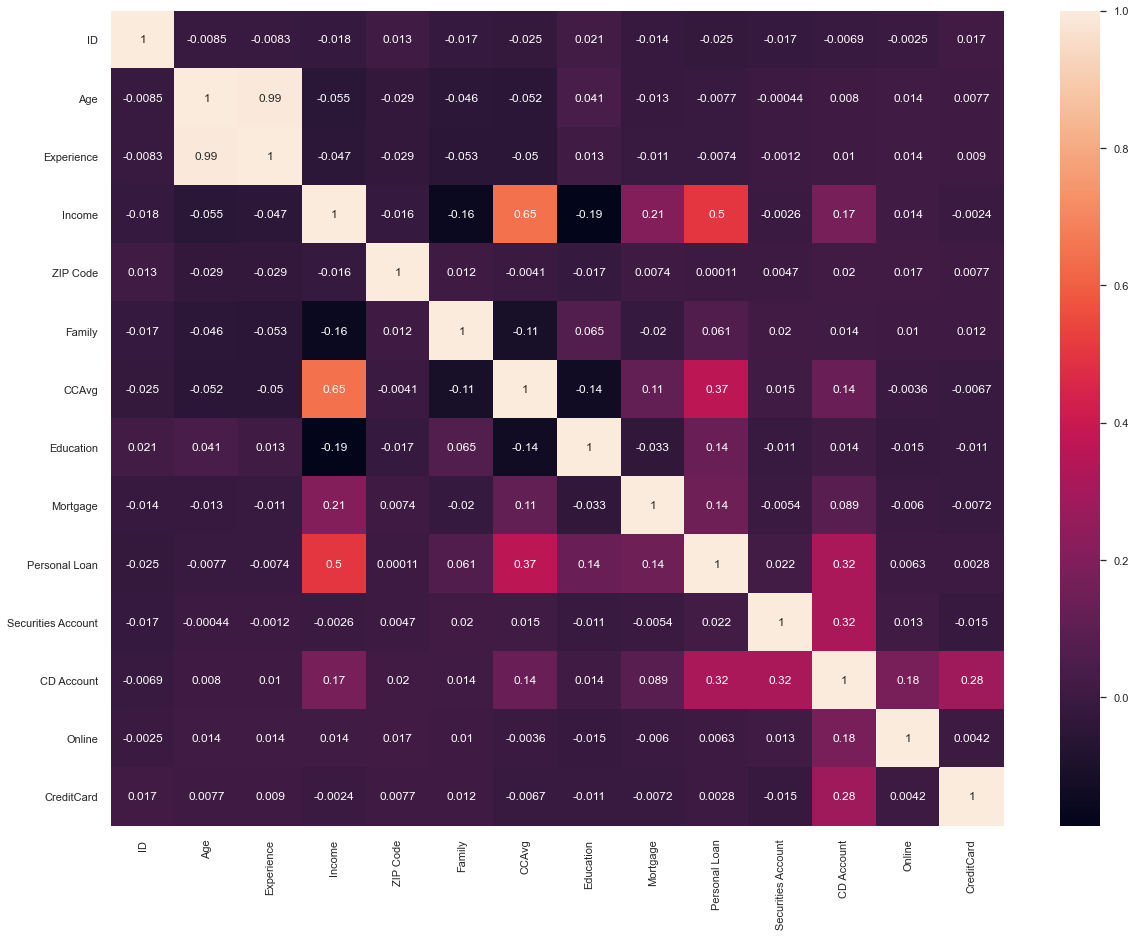

In [12]:
plt.figure(figsize=(20,15))

sns.heatmap(data.corr(), annot=True);

#### Personal Loan is highly correlated with Income, average spending on Credit cards, mortgage, education & if the customer has a certificate of deposit (CD) account with the bank.
#### Experience is highly correlated with Age (ρ = 0.993922)

#### profile the data

In [15]:
data.profile_report()

### observation with the 5 -point summary and correlation
- Mortgage is negatively skewed but we will allow the algorithm to manage it and not impute or correct anything in it
- CCAvg is negatively skewed but we will allow the algorithm to manage it and not impute or correct anything in it
- No duplicate rows

### Number of unique in each column

In [16]:
data.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

### Observation with the number of unique values

- We have a good spread of Age, Experience, Income, Family Size, Mortgage
- data with 467 zip code informs that the data was collected from multiple communities

### Number of people with zero mortgage

In [17]:
data[data.Mortgage == 0].Mortgage.count()

3462

#### Out of 5000 instances, 3462 have no current Mortgages

### Number of people with zero credit card spending per month

In [18]:
data[data.CCAvg == 0].CCAvg.count()

106

#### Out of 5000 instances, 106 have 0 average credit card spending

### Value counts of all categorical columns.

In [19]:
data.columns

categorical_columns = ['Family', 'Education', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard']

for col in categorical_columns:
    print(data[col].value_counts())
    print()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

1    2096
3    1501
2    1403
Name: Education, dtype: int64

0    4520
1     480
Name: Personal Loan, dtype: int64

0    4478
1     522
Name: Securities Account, dtype: int64

0    4698
1     302
Name: CD Account, dtype: int64

1    2984
0    2016
Name: Online, dtype: int64

0    3530
1    1470
Name: CreditCard, dtype: int64



#### Percent of all categorical columns.

In [20]:
for col in categorical_columns:
    print(data[col].value_counts(normalize=True) * 100)
    print()

1    29.44
2    25.92
4    24.44
3    20.20
Name: Family, dtype: float64

1    41.92
3    30.02
2    28.06
Name: Education, dtype: float64

0    90.4
1     9.6
Name: Personal Loan, dtype: float64

0    89.56
1    10.44
Name: Securities Account, dtype: float64

0    93.96
1     6.04
Name: CD Account, dtype: float64

1    59.68
0    40.32
Name: Online, dtype: float64

0    70.6
1    29.4
Name: CreditCard, dtype: float64



#### 42% of the candidates are graduated, while 30% are professional and 28% are Undergraduate.
#### Family size is fairly distributed
#### Approximately 94% of the customer doesn’t have a certificate of deposit (CD) account with the bank.
#### Around 71% of the customer doesn’t use a credit card issued by Bank.
#### Around 60% of customers use internet banking facilities.
#### Around 90% of the customer doesn’t accept the personal loan offered in the last campaign.
#### Around 90% of the customer doesn’t have a securities account with the bank.

### Univariate and Bivariate

Personal Loan     0    1
Family                  
1              1365  107
2              1190  106
3               877  133
4              1088  134

Personal Loan          0          1
Family                             
1              92.730978   7.269022
2              91.820988   8.179012
3              86.831683  13.168317
4              89.034370  10.965630



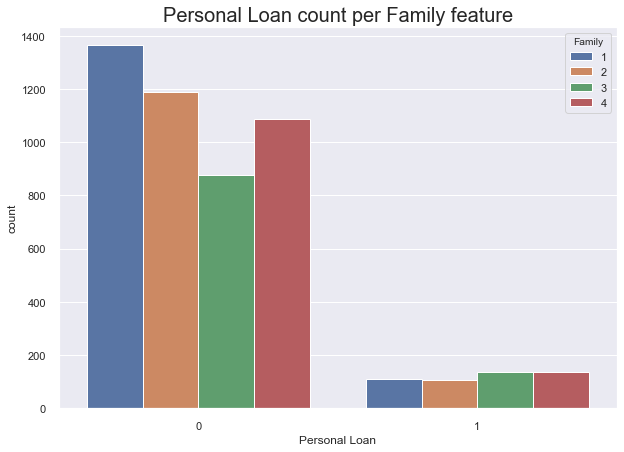

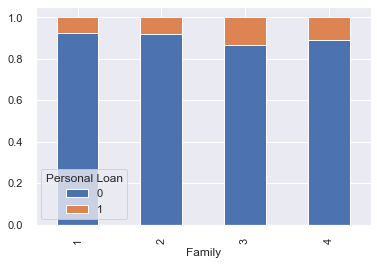

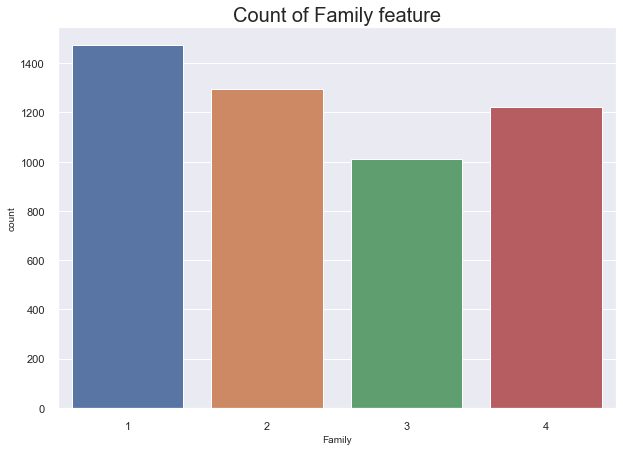

Personal Loan     0    1
Education               
1              2003   93
2              1221  182
3              1296  205

Personal Loan          0          1
Education                          
1              95.562977   4.437023
2              87.027798  12.972202
3              86.342438  13.657562



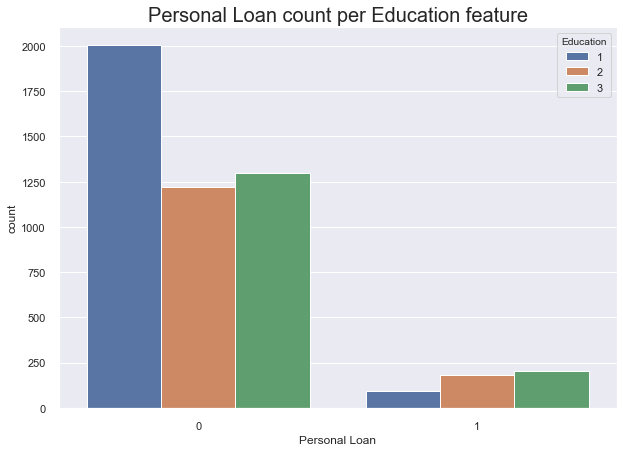

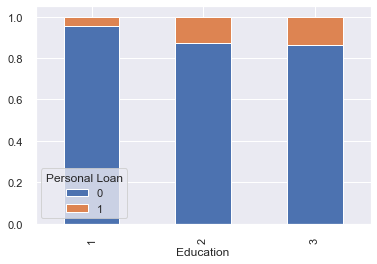

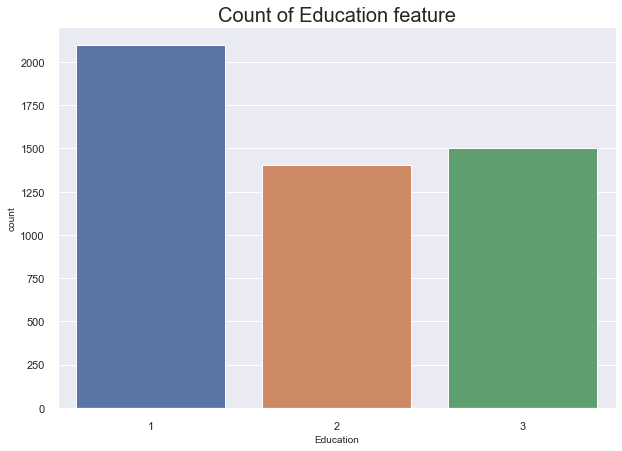

Personal Loan          0    1
Securities Account           
0                   4058  420
1                    462   60

Personal Loan               0          1
Securities Account                      
0                   90.620813   9.379187
1                   88.505747  11.494253



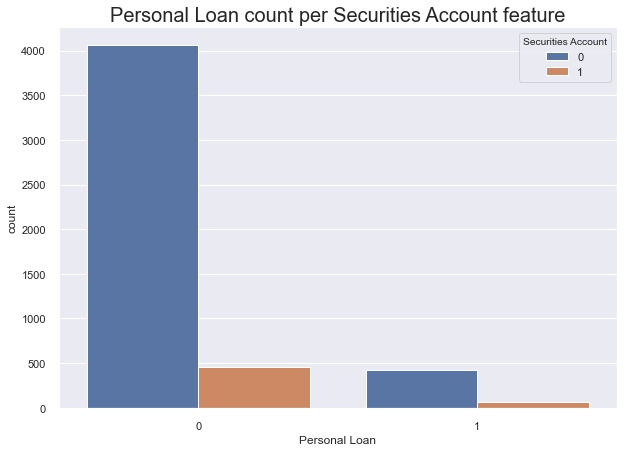

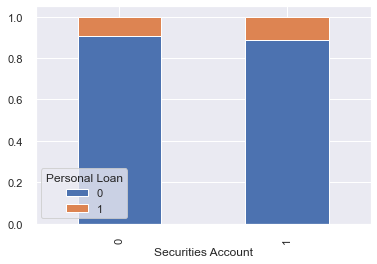

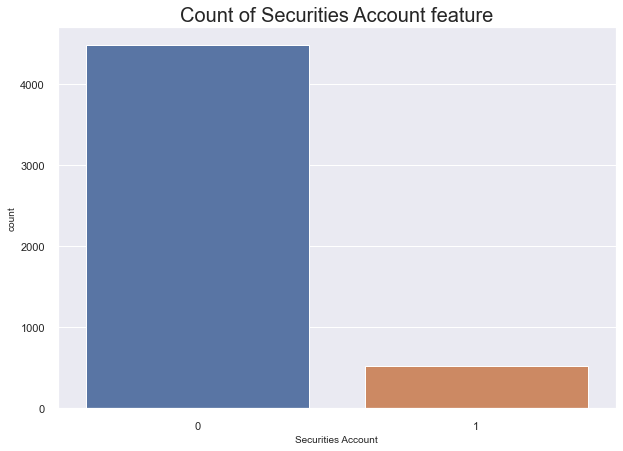

Personal Loan     0    1
CD Account              
0              4358  340
1               162  140

Personal Loan          0          1
CD Account                         
0              92.762878   7.237122
1              53.642384  46.357616



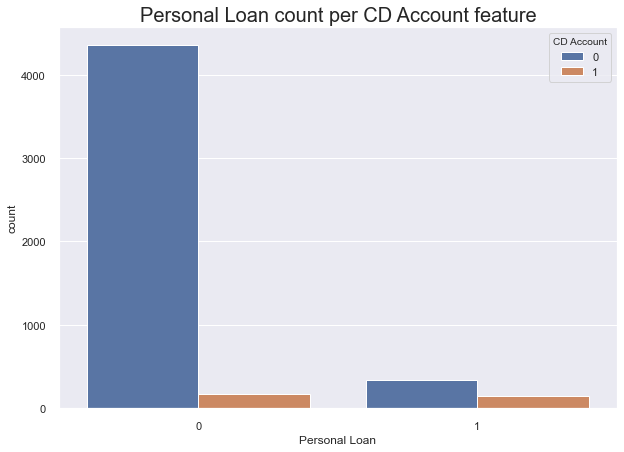

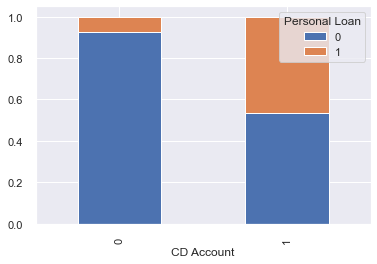

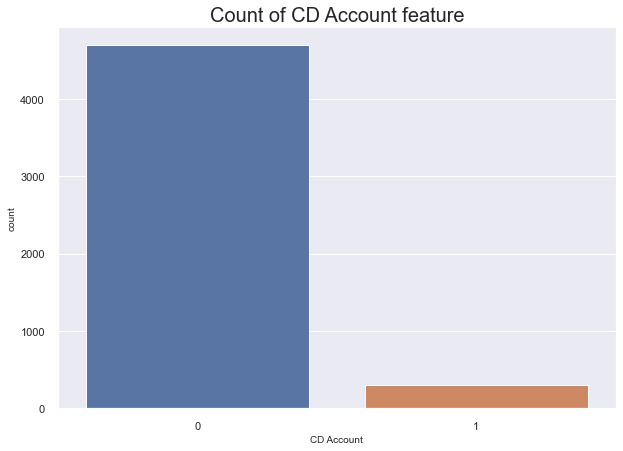

Personal Loan     0    1
Online                  
0              1827  189
1              2693  291

Personal Loan          0         1
Online                            
0              90.625000  9.375000
1              90.247989  9.752011



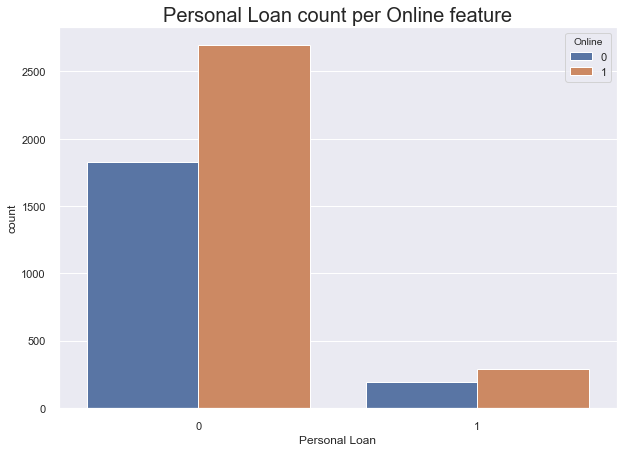

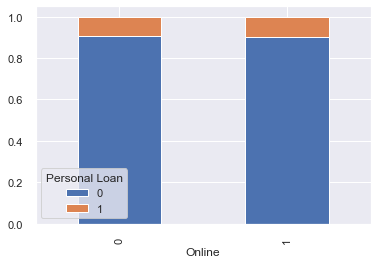

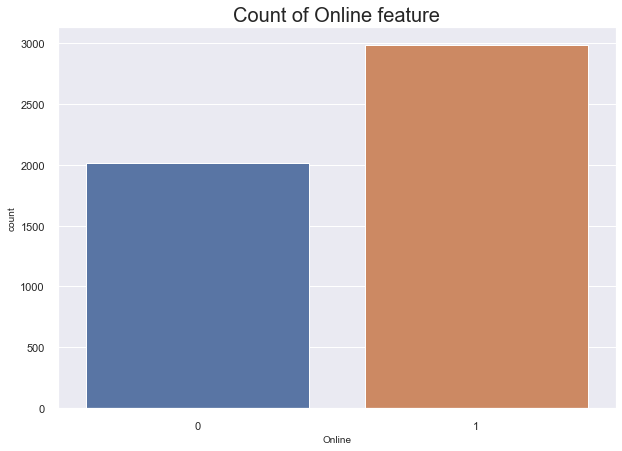

Personal Loan     0    1
CreditCard              
0              3193  337
1              1327  143

Personal Loan          0         1
CreditCard                        
0              90.453258  9.546742
1              90.272109  9.727891



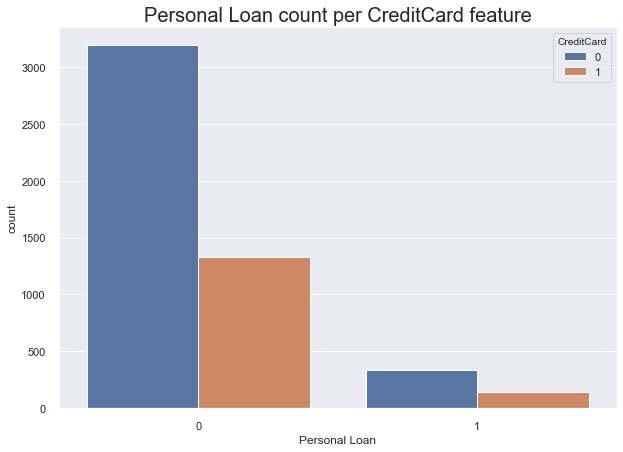

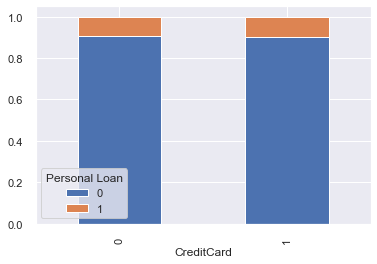

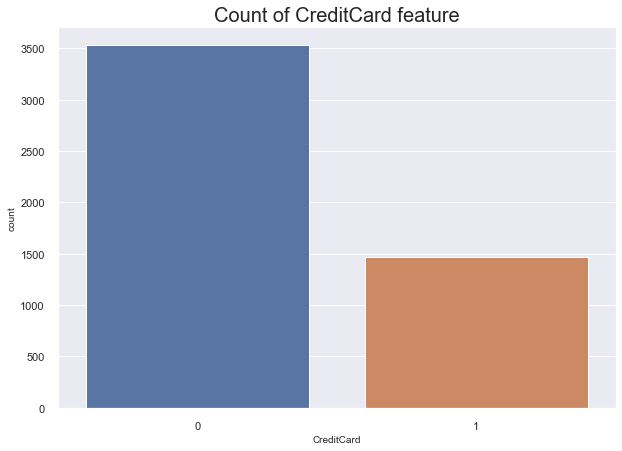

In [21]:
# Personal loan count based on educational level

def independent_count_plot(independent):
    plt.figure(figsize=(10,7))
    plt.title('Count of ' + independent + ' feature', fontsize=20)
    plt.xlabel(independent, fontsize=10)
    plt.ylabel('Count', fontsize=10)
    sns.countplot(x=independent, data=data)
    plt.show()

# count of a given independent feature against the dependent feature
def count_plot(independent, dependent):
    indep_vs_dep = pd.crosstab(data[independent], data[dependent])

    print (indep_vs_dep)

    print()

    print (indep_vs_dep.div(indep_vs_dep.sum(1).astype(float), axis = 0) * 100)

    print()

    plt.figure(figsize=(10,7))
    
    plt.title(dependent + ' count per ' + independent + ' feature', fontsize=20)
    
    sns.countplot(x=dependent, hue=independent, data=data);
    plt.show()
    
    indep_vs_dep.div(indep_vs_dep.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
    

def univariant_categorical(independent, dependent):
    count_plot(independent, dependent)

    independent_count_plot(independent)
        
# Univariant: Personal loan count based on educational level

categorical_columns = ['Family', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard']

for col in categorical_columns:
    univariant_categorical(col, 'Personal Loan')

#### Personal Loan is highly correlated with Income, average spending on Credit cards, mortgage & if the customer has a certificate of deposit (CD) account with the bank.

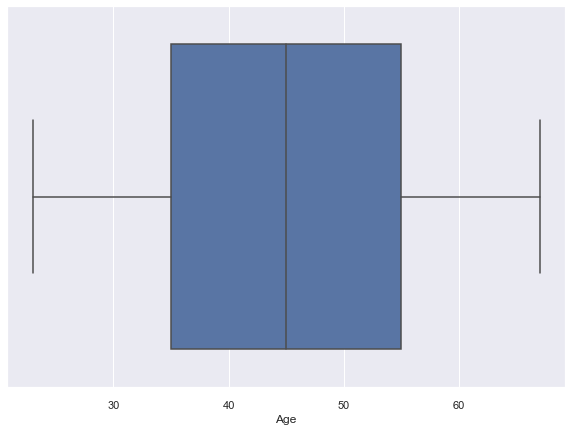

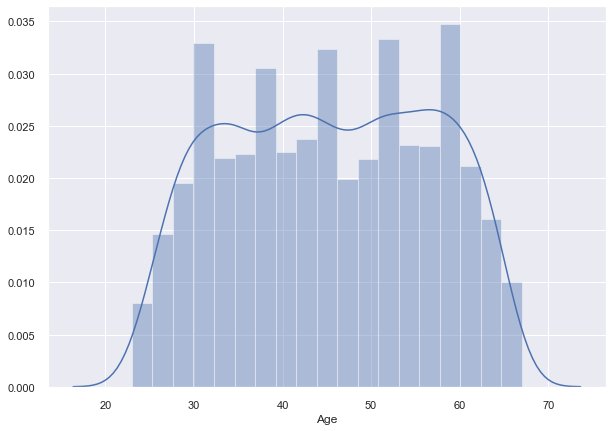

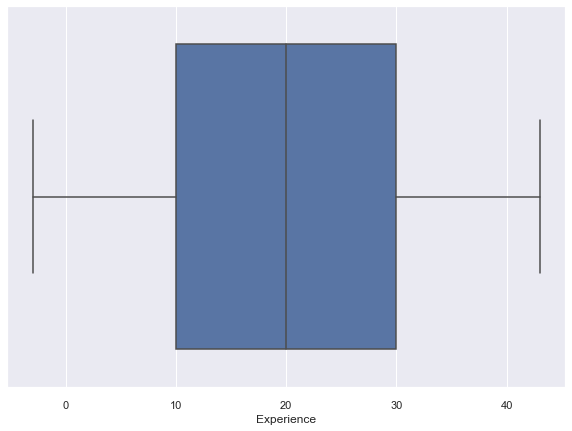

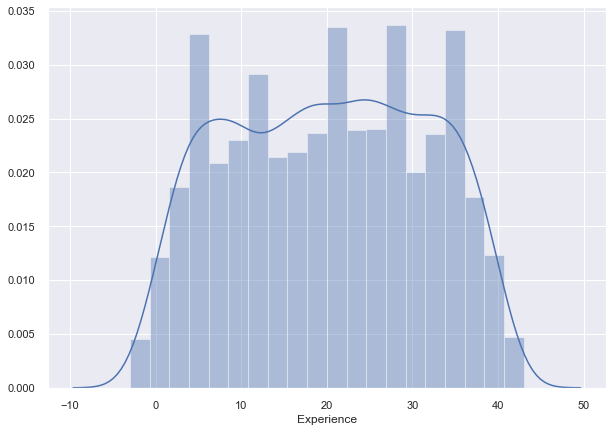

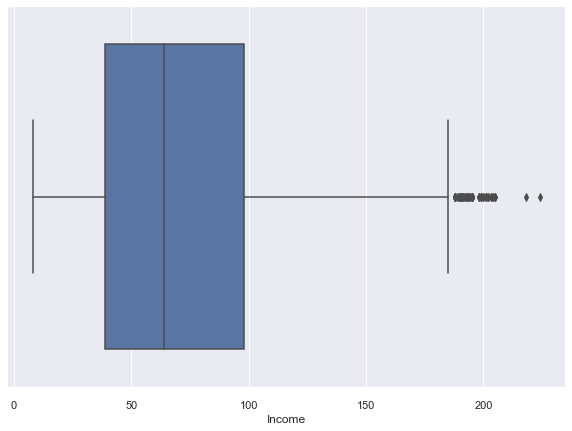

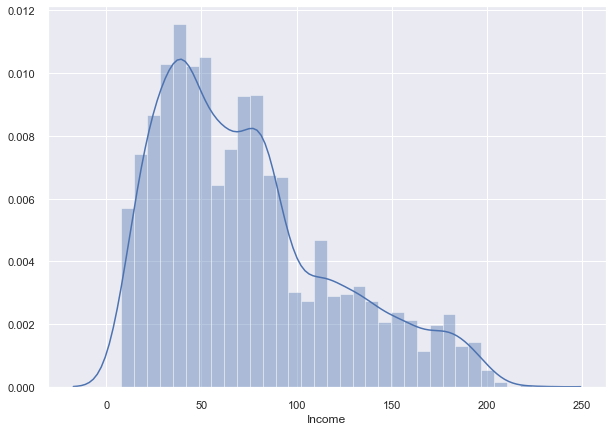

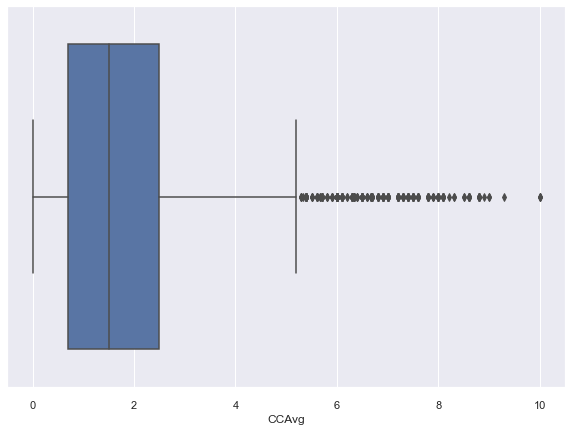

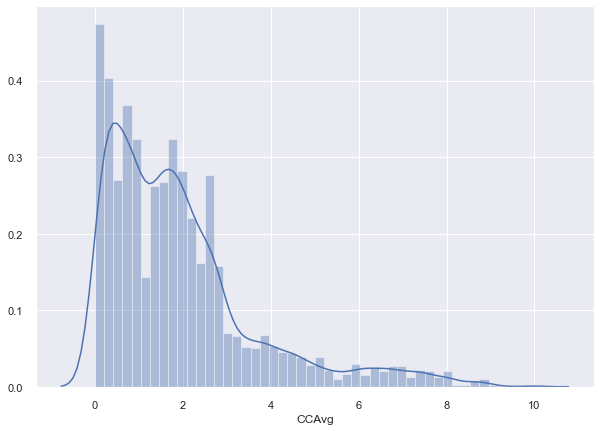

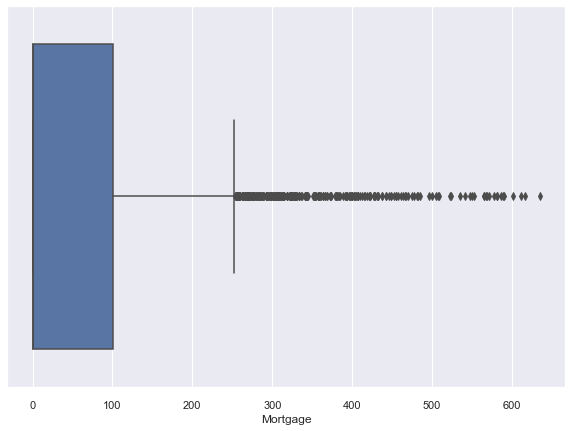

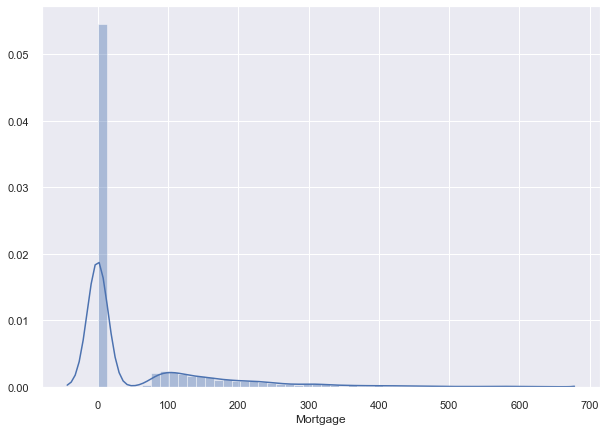

In [22]:
def box_independent(independent):
    plt.figure(figsize=(10,7))
    sns.boxplot(data=data, x = independent);
    plt.show()
    
def dist_plot(independent):
    plt.figure(figsize=(10,7))

    sns.distplot(data[independent]);
    
def univariant_contineous(independent, dependent):
    box_independent(independent)
    
    dist_plot(independent)
    

contineous_feature = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']

for col in contineous_feature:
    univariant_contineous(col, 'Personal Loan')

### Observation from the boxplot and histogram
1. Age and Experience has got a good distribution
2. Income and CCAvg is positively skewed
3. Mortgage is highly skewed to the right and probably can be ignored when fitting the model.

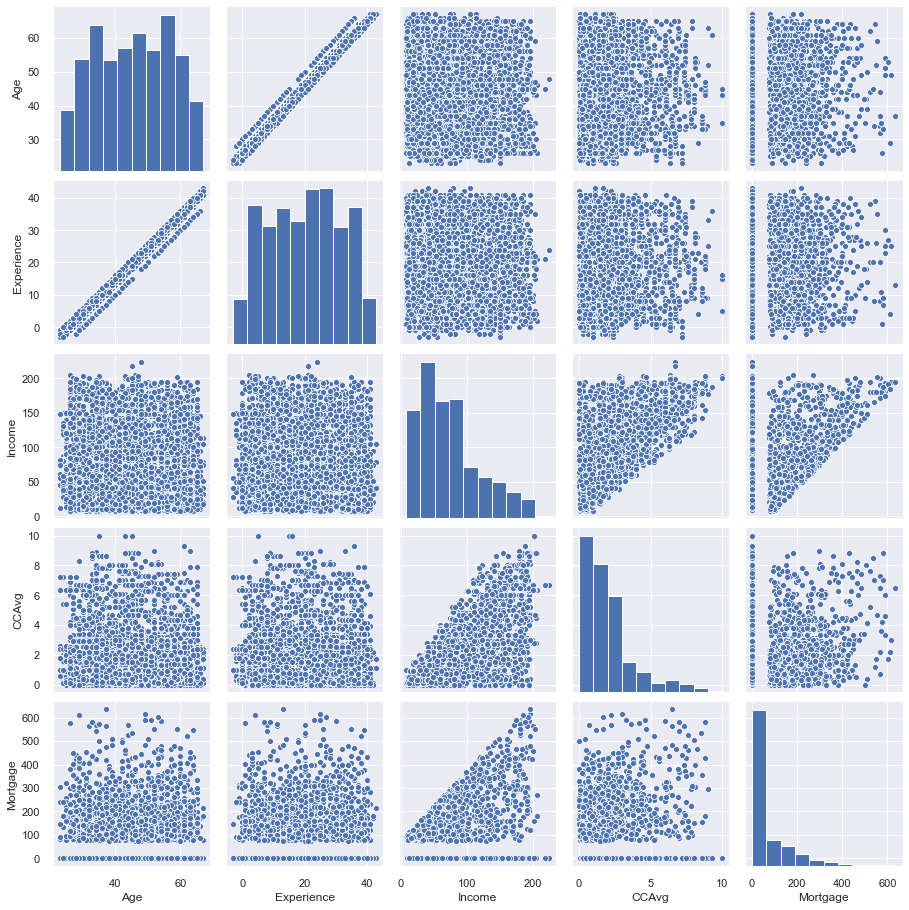

In [23]:
sns.pairplot(data[contineous_feature]);

#### Observation from the scatter plots
1. Age and Experience are highly correlated as was also observed in the correlation (using heatmap and corr())
2. Income have a correlation have a relation where with the increase in income, customer's Mortgage and CCAvg also increases
3. Mortgage, Age, Experience do not have linear relation and is scattered

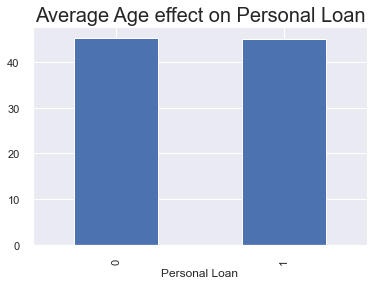

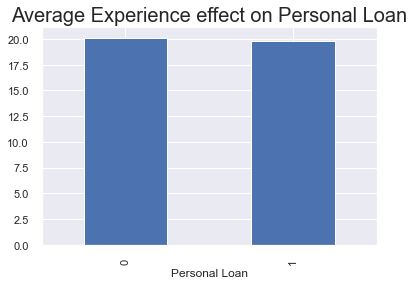

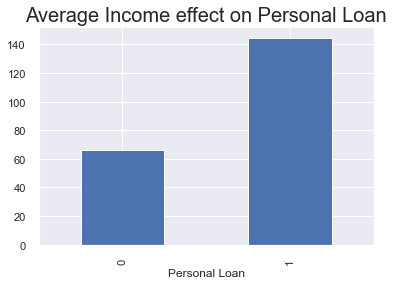

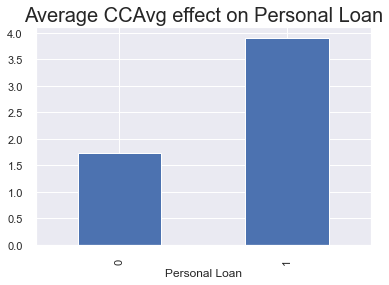

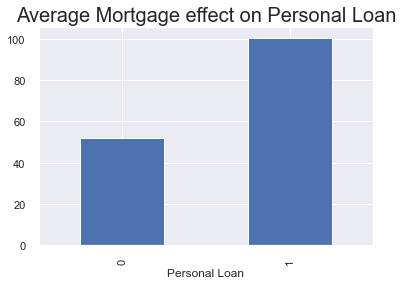

In [24]:
# average_contineous_plot(independent, dependent)
def average_contineous_plot(independent, dependent):
    data.groupby(dependent)[independent].mean().plot(kind='bar')
    plt.title('Average ' + independent + ' effect on ' + dependent, fontsize=20)
    plt.show()
    print()

for col in contineous_feature:
    average_contineous_plot(col, 'Personal Loan')

#### Observation from the chart above
1. Average Age with Personal loan is almost the same, which implies that it is not providing a good relation
2. People with high income buys more personal loan
2. People with high CCAvg spending buys more personal loan
3. People having more average mortgage buys more personal loan

In [25]:
# Let's look at the skewness of data
skew_df = pd.DataFrame({'Skewness' : [stats.skew(data.Age),
                                      stats.skew(data.Experience),
                                      stats.skew(data.Income),
                                      stats.skew(data.CCAvg)
                                      ,stats.skew(data.Mortgage)]},
                       index=['Age','Experience','Income','CCAvg','Mortgage'])
skew_df

Skewness
Age        -0.029332
Experience -0.026317
Income      0.841086
CCAvg       1.597964
Mortgage    2.103371

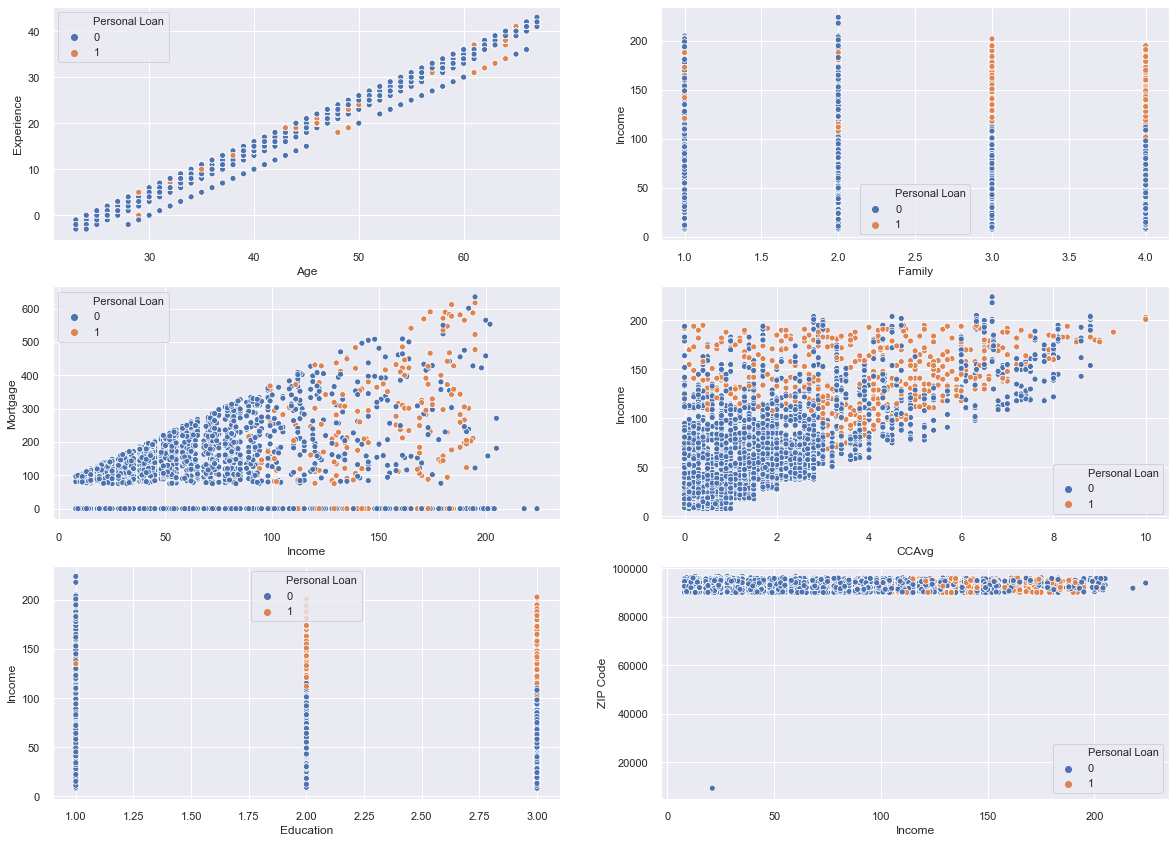

<Figure size 720x504 with 0 Axes>

In [26]:
plt.figure(figsize=(20,30))

plt.subplot(6,2,1)
sns.scatterplot(data.Age, data.Experience, hue = data['Personal Loan']);

plt.subplot(6,2,2)
sns.scatterplot(data.Family, data.Income, hue = data['Personal Loan']);

plt.subplot(6,2,3)
sns.scatterplot(data.Income, data.Mortgage, hue = data['Personal Loan']);

plt.subplot(6,2,4)
sns.scatterplot(data.CCAvg, data.Income, hue = data['Personal Loan'])

plt.subplot(6,2,5)
sns.scatterplot(data.Education, data.Income, hue = data['Personal Loan']);

plt.subplot(6,2,6)
sns.scatterplot(data.Income, data['ZIP Code'], hue = data['Personal Loan']);

plt.figure(figsize=(10,7));
plt.show()

#### From all of the the above plots, we can infer that 
1. customers who are more educated have a higher probability of buying personal loans.
2. The number of family members not significantly affect buying of personal loan.
3. The customer who has a certificate of deposit (CD) account with the bank seems to buy personal loans from the bank.
4. The customer who uses or doesn’t use a credit card issued by Bank doesn’t seem to affect the probability of buying a personal loan.
5. The customer who uses or doesn’t use internet banking facilities seems to not affect the probability of buying personal loans.
6. The customers who have or don’t have securities account with the bank do not affect the probability of buying a personal loan.

### Get data model ready

1. Remove negative experience
2. Replace all 0s with the mean for 'Age', 'Family'. Note that 0 is a valid value for 'Experience', 'Income', 'CCAvg', 'Mortgage' and all other categorical variables
3. Perform one-hot encoding on the multi-class categorical features
4. Treat outliers using scalar
5. Remove 'ID', 'ZIP code' from the data
6. Age is highly correlated to the Experience, we can skip the Age and use only the experience 

#### Remove negative experience

In [27]:
data_processed = data.copy()

In [28]:
# 5 point summary informed of incorrect/negative 'Experience' value. We need to correct it and use the 
# median in the given age range

# Binning

bin_edges = [22, 27, 32, 37, 42, 47, 52, 57, 62, 68]         # edges to define intervals
bin_labels = ['22-27', '28-32', '33-37','38-42', '43-47', '48-52',
              '53-57','58-62', '63-68']               # labels to denote each interval
data['AgeBin'] = pd.cut(data_processed['Age'], bins=bin_edges , labels=bin_labels)
# pd.cut is used to divide the continous column in different groups as per bin egges and named according to bin label.

data_processed[data_processed.Experience < 0]['Experience'].count()

52

In [29]:
#
# Correct the experience value with the average experience for a given age group
#
data.groupby('AgeBin')['Experience'].mean().apply(np.ceil)['22-27']
avgExp = data[data.Experience >= 0].groupby('AgeBin')['Experience'].mean().apply(np.ceil)
avgExp

for i, j in data[data.Experience < 0].iterrows():
    data.at[i,'Experience'] = avgExp[j['AgeBin']]
    
data.drop('AgeBin', axis=1, inplace=True)
data[data.Experience < 0]

Empty DataFrame
Columns: [ID, Age, Experience, Income, ZIP Code, Family, CCAvg, Education, Mortgage, Personal Loan, Securities Account, CD Account, Online, CreditCard]
Index: []

#### Experience now is been taken care with the average experience in the given age group

#### Replace all 0s with the mean for 'Age', 'Family'. Note that 0 is a valid value for 'Experience', 'Income', 'CCAvg', 'Mortgage' and all other categorical variables

In [30]:
# Run imputer to fill all places where 0 is not a valid value with its mean

from sklearn.impute import SimpleImputer
rep_0 = SimpleImputer(missing_values=0, strategy="mean")
cols=['Age','Family']
imputer = rep_0.fit(data_processed[cols])
data_processed[cols] = imputer.transform(data_processed[cols])

data_processed.head(10)

ID   Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1  25.0           1      49     91107     4.0    1.6          1         0   
1   2  45.0          19      34     90089     3.0    1.5          1         0   
2   3  39.0          15      11     94720     1.0    1.0          1         0   
3   4  35.0           9     100     94112     1.0    2.7          2         0   
4   5  35.0           8      45     91330     4.0    1.0          2         0   
5   6  37.0          13      29     92121     4.0    0.4          2       155   
6   7  53.0          27      72     91711     2.0    1.5          2         0   
7   8  50.0          24      22     93943     1.0    0.3          3         0   
8   9  35.0          10      81     90089     3.0    0.6          2       104   
9  10  34.0           9     180     93023     1.0    8.9          3         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1  
5              0                   0           0       1           0  
6              0                   0           0       1           0  
7              0                   0           0       0           1  
8              0                   0           0       1           0  
9              1                   0           0       0           0

In [31]:
data_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   float64
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   float64
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(3), int64(11)
memory usage: 547.0 KB


In [32]:
data_processed.head()

ID   Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1  25.0           1      49     91107     4.0    1.6          1         0   
1   2  45.0          19      34     90089     3.0    1.5          1         0   
2   3  39.0          15      11     94720     1.0    1.0          1         0   
3   4  35.0           9     100     94112     1.0    2.7          2         0   
4   5  35.0           8      45     91330     4.0    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [33]:
# convert Education and Family to categorical data and apply one hot encoding
data_processed['Education'] = data_processed['Education'].astype('category')
data_processed['Family'] = data_processed['Family'].astype('category')

In [35]:
data_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  5000 non-null   int64   
 1   Age                 5000 non-null   float64 
 2   Experience          5000 non-null   int64   
 3   Income              5000 non-null   int64   
 4   ZIP Code            5000 non-null   int64   
 5   Family              5000 non-null   category
 6   CCAvg               5000 non-null   float64 
 7   Education           5000 non-null   category
 8   Mortgage            5000 non-null   int64   
 9   Personal Loan       5000 non-null   int64   
 10  Securities Account  5000 non-null   int64   
 11  CD Account          5000 non-null   int64   
 12  Online              5000 non-null   int64   
 13  CreditCard          5000 non-null   int64   
dtypes: category(2), float64(2), int64(10)
memory usage: 478.9 KB


#### Remove 'ID', 'ZIP code' from the data
#### Age is highly correlated to the Experience, we can skip the Age and use only the experience 

In [36]:
data_processed = data_processed.drop(columns=['ID', 'ZIP Code', 'Age'])

#### Treat the outliers using RobustScalar

In [37]:
# treat the outliers using RobustScalar
from sklearn import preprocessing

scaler = preprocessing.RobustScaler()

# Get list of independent variables to scale
variables_to_scale = ['Income', 'CCAvg', 'Mortgage', 'Experience']

data_processed[variables_to_scale] = scaler.fit_transform(data_processed[variables_to_scale])

data_processed

Experience    Income Family     CCAvg Education  Mortgage  \
0          -0.95 -0.254237    4.0  0.055556         1  0.000000   
1          -0.05 -0.508475    3.0  0.000000         1  0.000000   
2          -0.25 -0.898305    1.0 -0.277778         1  0.000000   
3          -0.55  0.610169    1.0  0.666667         2  0.000000   
4          -0.60 -0.322034    4.0 -0.277778         2  0.000000   
...          ...       ...    ...       ...       ...       ...   
4995       -0.85 -0.406780    1.0  0.222222         3  0.000000   
4996       -0.80 -0.830508    4.0 -0.611111         1  0.841584   
4997        0.95 -0.677966    2.0 -0.666667         3  0.000000   
4998        1.00 -0.254237    3.0 -0.555556         2  0.000000   
4999       -0.80  0.322034    3.0 -0.388889         1  0.000000   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  
0                 0                   1           0       0           0  
1                 0                   1           0       0           0  
2                 0                   0           0       0           0  
3                 0                   0           0       0           0  
4                 0                   0           0       0           1  
...             ...                 ...         ...     ...         ...  
4995              0                   0           0       1           0  
4996              0                   0           0       1           0  
4997              0                   0           0       0           0  
4998              0                   0           0       1           0  
4999              0                   0           0       1           1  

[5000 rows x 11 columns]

#### apply one-hot encoding on the multi-class categorical variables

In [38]:
data_processed = pd.get_dummies(data_processed, drop_first=True)

data_processed

Experience    Income     CCAvg  Mortgage  Personal Loan  \
0          -0.95 -0.254237  0.055556  0.000000              0   
1          -0.05 -0.508475  0.000000  0.000000              0   
2          -0.25 -0.898305 -0.277778  0.000000              0   
3          -0.55  0.610169  0.666667  0.000000              0   
4          -0.60 -0.322034 -0.277778  0.000000              0   
...          ...       ...       ...       ...            ...   
4995       -0.85 -0.406780  0.222222  0.000000              0   
4996       -0.80 -0.830508 -0.611111  0.841584              0   
4997        0.95 -0.677966 -0.666667  0.000000              0   
4998        1.00 -0.254237 -0.555556  0.000000              0   
4999       -0.80  0.322034 -0.388889  0.000000              0   

      Securities Account  CD Account  Online  CreditCard  Family_2.0  \
0                      1           0       0           0           0   
1                      1           0       0           0           0   
2                      0           0       0           0           0   
3                      0           0       0           0           0   
4                      0           0       0           1           0   
...                  ...         ...     ...         ...         ...   
4995                   0           0       1           0           0   
4996                   0           0       1           0           0   
4997                   0           0       0           0           1   
4998                   0           0       1           0           0   
4999                   0           0       1           1           0   

      Family_3.0  Family_4.0  Education_2  Education_3  
0              0           1            0            0  
1              1           0            0            0  
2              0           0            0            0  
3              0           0            1            0  
4              0           1            1            0  
...          ...         ...          ...          ...  
4995           0           0            0            1  
4996           0           1            0            0  
4997           0           0            0            1  
4998           1           0            1            0  
4999           1           0            0            0  

[5000 rows x 14 columns]

### We did not removed the 'Mortgage' from the independent feature since it had a very high effect on the 'Personal loan'

## Split the data into training and test set in the ratio of 70:30 respectively<a class="anchor" id='3'></a>

In [39]:
from sklearn.model_selection import train_test_split

pdata = data_processed.copy() 

pdata

X = pdata.drop('Personal Loan',axis=1)     # Predictor feature columns (8 X m)
y = pdata['Personal Loan']   # Predicted class (1=True, 0=False) (1 X m)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.head()

Experience    Income     CCAvg  Mortgage  Securities Account  \
1840        0.25 -0.694915 -0.611111  0.871287                   0   
2115        0.55 -0.576271 -0.055556  0.000000                   0   
4437        0.90 -0.016949  0.000000  0.000000                   0   
1146       -0.65  0.118644 -0.777778  0.772277                   1   
2486        0.80  1.118644 -0.111111  2.544554                   0   

      CD Account  Online  CreditCard  Family_2.0  Family_3.0  Family_4.0  \
1840           0       0           0           0           0           1   
2115           0       0           0           0           1           0   
4437           0       1           0           1           0           0   
1146           0       0           0           0           0           0   
2486           0       0           0           0           0           0   

      Education_2  Education_3  
1840            0            1  
2115            0            0  
4437            0            0  
1146            0            0  
2486            0            0

Lets check the split data

In [40]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(pdata.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(pdata.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [41]:
print("Original Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(pdata.loc[pdata['Personal Loan'] == 1]), (len(pdata.loc[pdata['Personal Loan'] == 1])/len(pdata.index)) * 100))
print("Original Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(pdata.loc[pdata['Personal Loan'] == 0]), (len(pdata.loc[pdata['Personal Loan'] == 0])/len(pdata.index)) * 100))
print("")
print("Training Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Personal Loan True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Personal Loan False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Personal Loan True Values    : 480 (9.60%)
Original Personal Loan False Values   : 4520 (90.40%)

Training Personal Loan True Values    : 323 (9.23%)
Training Personal Loan False Values   : 3177 (90.77%)

Test Personal Loan True Values        : 157 (10.47%)
Test Personal Loan False Values       : 1343 (89.53%)



## Use Logistic Regression model to predict the number of a customers buying personal loans. Print all the metrics related for evaluating the model performance<a class="anchor" id='4'></a>

## Logistics Regression using statsmodel

In [42]:
#Build the logistic regression model
import statsmodels.api as sm

logit = sm.Logit(y_train, sm.add_constant(X_train))
lg = logit.fit()

Optimization terminated successfully.
         Current function value: 0.117716
         Iterations 9


In [43]:
#Summary of logistic regression
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:          Personal Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3486
Method:                           MLE   Df Model:                           13
Date:                Tue, 07 Jul 2020   Pseudo R-squ.:                  0.6175
Time:                        12:33:40   Log-Likelihood:                -412.01
converged:                       True   LL-Null:                       -1077.3
Covariance Type:            nonrobust   LLR p-value:                1.401e-276
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -8.0298      0.442    -18.186      0.000      -8.895      -7.164
Experience             0.2484      0.161      1.541      0.123      -0.067       0.564
Income              

### Interpretation of Pseudo R^2

A pseudo R^2 of 65% indicates that 65% of the uncertainty of the intercept only model is explained by the full model

#### Calculate the odds ratio from the coef using the formula odds ratio=exp(coef)

#### Calculate the probability from the odds ratio using the formula probability = odds / (1+odds)

In [44]:
#Calculate Odds Ratio, probability
##create a data frame to collate Odds ratio, probability and p-value of the coef
lgcoef = pd.DataFrame(lg.params, columns=['coef'])
lgcoef.loc[:, "Odds_ratio"] = np.exp(lgcoef.coef)
lgcoef['probability'] = lgcoef['Odds_ratio']/(1+lgcoef['Odds_ratio'])
lgcoef['pval']=lg.pvalues
pd.options.display.float_format = '{:.2f}'.format

In [45]:
# FIlter by significant p-value (pval <0.1) and sort descending by Odds ratio
lgcoef = lgcoef.sort_values(by="Odds_ratio", ascending=False)
pval_filter = lgcoef['pval']<=0.1
lgcoef[pval_filter]

coef  Odds_ratio  probability  pval
Education_3         3.83       46.17         0.98  0.00
Education_2         3.69       39.93         0.98  0.00
CD Account          3.63       37.86         0.97  0.00
Income              3.46       31.69         0.97  0.00
Family_3.0          1.70        5.48         0.85  0.00
Family_4.0          1.68        5.38         0.84  0.00
CCAvg               0.34        1.41         0.58  0.00
Mortgage            0.13        1.13         0.53  0.07
Online             -0.64        0.53         0.34  0.00
Securities Account -0.87        0.42         0.30  0.02
CreditCard         -1.07        0.34         0.25  0.00
const              -8.03        0.00         0.00  0.00

- Customer with high education have very high probablility (approx 98% to 99%) of buying Personal Loan
- Customer holding CD Account have %97 chances of buying the Personal Loan
- Family of all sizes have probability of buy Personal Loan

### Model building using Logistic Regression from Sklearn 

We will use the sklearn library to build the model and make predictions

In [46]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score, classification_report

# Fit the model on train
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
y_predict = model.predict(X_test)

In [48]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Training accuracy 0.9574285714285714

Testing accuracy 0.962

Confusion Matrix


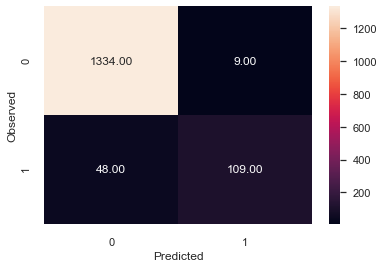

None

Recall: 0.6942675159235668

Precision: 0.923728813559322

F1 Score: 0.7927272727272728

Roc Auc Score: 0.8437830505902272


In [49]:
print("Training accuracy",model.score(X_train,y_train))  
print()
print("Testing accuracy",model.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

The confusion matrix

True Positives (TP): we correctly predicted that they will take personal loans 109

True Negatives (TN): we correctly predicted that they will not take personal loan 1334

False Positives (FP): we incorrectly predicted that they will take personal loan (a "Type I error") 9 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they will not take personal loans (a "Type II error") 48 Falsely predict negative Type II error

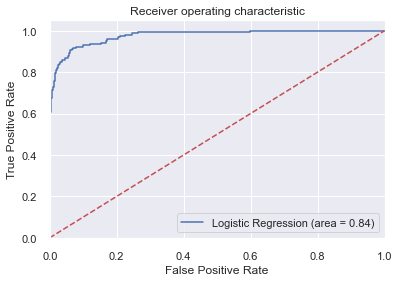

In [50]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [51]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1343
           1       0.92      0.69      0.79       157

    accuracy                           0.96      1500
   macro avg       0.94      0.84      0.89      1500
weighted avg       0.96      0.96      0.96      1500



## Give your reasoning on how can the model perform better?<a class="anchor" id='5'></a>


### Check model output and change model parameters
And here we are with a classification report which consists of a precision, recall, f1-score & support, Also the accuracy_score and a 2*2 confusion matrix. How to determine if our model has done well…? Well first have a look at the accuracy, 96% accuracy is not a small thing, but we know from the data that the number of buyer’s percentage to the non-buyer percentage is very less. Hence accuracy didn’t play a big role in determining how our model performed.

##### We will look upon the error types now:
- True Positives (TP): we correctly predicted that they will take personal loans 109
- True Negatives (TN): we correctly predicted that they will not take personal loan 1334
- False Positives (FP): we incorrectly predicted that they will take personal loan (a "Type I error") 11 Falsely predict positive Type I error
- False Negatives (FN): we incorrectly predicted that they will not take personal loans (a "Type II error") 48 Falsely predict negative Type II error
  -- In our case, the null hypothesis presents the non-buyer case, while the alternate hypothesis is the buyer one.

We must concentrate upon or reduce type II error here since we are interested in the customers who had actually bought personal loans, but our model predicted them to be a non-buyer.

### Check False Negatives
Eventually, we can concentrate upon our confusion matrix and look for the False Negatives which in this case is 48, less the number of False Negatives, wiser our model will be or we can directly look upon the recall for ‘1’ which in this case is 69%. So, in this case, out of the total number of customers who actually bought personal loans our model is only able to pick 69% of customers of them to be correctly predicted.

#### We will also compare the area under roc curve to determine how our model performs. In this case, the area comes out to be around 84% which is good.


In [52]:
# Checking Parameters of logistic regression
model.get_params()

#If we dont specify the parameters in the model it takes default value
# We can change the solver, penalty, C, multi_class, fit-intercept, dual, cweight and find the effect on the 
# accuracy, recall, precision, roc, auc

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

#### Fit the train data with different parameters of Logistic Regression and pick the top best models that had good accuracy score, recall score, precision score and roc score
- We will run through all parameter combinations in the cell below and prepare a data frame with the top performers

In [53]:
# 'penalty': 'l1', 'l2', 'elasticnet' or 'none', 
### 'newton-cg', 'sag' and 'lbfgs' solvers support only l2 penalties
### 'elasticnet' is only supported by the 'saga' solver
### 
### multi_class : str, {'ovr', 'multinomial', 'auto'}
### - If the option chosen is 'ovr', then a binary problem is fit for each
###    label. For 'multinomial' the loss minimised is the multinomial loss fit
###    across the entire probability distribution, *even when the data is
###    binary*. 'multinomial' is unavailable when solver='liblinear'.
###    'auto' selects 'ovr' if the data is binary, or if solver='liblinear',
###    and otherwise selects 'multinomial'.
### 
### dual: True or False
### - bool, optional (default=False)
###    Dual or primal formulation. Dual formulation is only implemented for
###    l2 penalty with liblinear solver. Prefer dual=False when
###    n_samples > n_features.
###
### fit_intercept: True or False
### 
### solver: {'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'}
###

cols = ['solver', 'penalty', 'multi_class', 'dual', 'fit_intercept', 
                                         'class_weight', 'C', 
                                         'train score', 'test score', 'recall score', 'precision score', 
                                         'roc auc score']

col_types = [('solver', str), 
             ('penalty', str), 
             ('multi_class', str), 
             ('dual', bool), 
             ('fit_intercept', bool), 
             ('class_weight', str), ('C', np.float128), 
             ('train score', np.float128), ('test score', np.float128), 
             ('recall score', np.float128), 
             ('precision score', np.float128), 
             ('roc auc score', np.float128)]

df_compare_model = pd.DataFrame({k: pd.Series(dtype=t) for k, t in col_types})

idx = 0

rows_list = []

def regression_using_params():
    
    test_accuracy = 0.0
    train_accuracy = 0.0
    test_rscore = 0.0
    test_pscore = 0.0
    test_auc = 0.0
    
    global df_compare_model
    global idx
    global rows_list
    
    penalties = ['l1', 'l2', 'elasticnet', 'none']
    multi_class = ['ovr', 'multinomial', 'auto']
    dual = [True, False]
    fit_intercept = [True, False]
    solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
    C = [0.010000,0.100000,0.250000,0.500000,0.750000,1.000000]
    cweight = ['balanced', None]
    
    for solv in solver:
        for p in penalties:
            for mclass in multi_class:
                for d in dual:
                    for fi in fit_intercept:
                        for cw in cweight:
                            for cval in C:
                                lr = LogisticRegression(solver=solv, 
                                                            max_iter=1000, 
                                                            penalty=p, 
                                                            dual=d, 
                                                            fit_intercept=fi, 
                                                            class_weight=cw,
                                                            C=cval, 
                                                            random_state=42)

                                # Solver newton-cg supports only 'l2' or 'none' penalties.
                                if solv == 'newton-cg' and p not in ('l2', 'none'):
                                    continue

                                # Solver newton-cg supports only dual=False
                                if solv == 'newton-cg' and d == True:
                                    continue

                                # Solver lbfgs supports only 'l2' or 'none' penalties.
                                if solv == 'lbfgs' and p not in ('l2', 'none'):
                                    continue

                                # Solver lbfgs supports only dual=False
                                if solv == 'lbfgs' and d == True:
                                    continue

                                # The combination of penalty='l1' and loss='logistic_regression' are not supported 
                                # when dual=True, Parameters: penalty='l1', loss='logistic_regression', dual=True
                                if p == 'l1' and d == True:
                                    continue

                                # Only 'saga' solver supports elasticnet penalty
                                if solv != 'saga' and p == 'elasticnet':
                                    continue

                                # penalty='none' is not supported for the liblinear solver
                                if solv == 'liblinear' and p == 'none':
                                    continue

                                # Solver sag supports only 'l2' or 'none' penalties
                                if solv == 'sag' and p not in ('l2', 'none'):
                                    continue

                                # Solver sag supports only dual=False
                                if solv == 'sag' and d == True:
                                    continue

                                # Solver saga supports only dual=False
                                if solv == 'saga' and d == True:
                                    continue

                                # l1_ratio must be between 0 and 1; got (l1_ratio=None)
                                # Liner regression on:  saga elasticnet False True
                                if solv == 'saga' and p == 'elasticnet' and d == False:
                                    continue

                                lr.fit(X_train, y_train)

                                model_score_train = lr.score(X_train, y_train)

                                model_score_test = lr.score(X_test, y_test)
                                
                                y_predict = model.predict(X_test)
                                
                                rscore = recall_score(y_test,y_predict)
                                
                                pscore = precision_score(y_test,y_predict)
                                
                                f1 = f1_score(y_test,y_predict)
                                
                                ras = roc_auc_score(y_test,y_predict)
                                
                                new_row = {'solver':solv, 'penalty': p, 'multi_class': mclass, 'dual': d, 
                                           'fit_intercept': fi,
                                           'class_weight': cw, 'C':cval, 
                                           'train score': model_score_train, 
                                           'test score': model_score_test, 
                                           'recall score': rscore, 
                                           'precision score': pscore, 
                                           'roc auc score': ras} 
                                
                                # 
                                # pick models that have high accuracy
                                # 
                                if (model_score_test >= test_accuracy and 
                                   model_score_train >= train_accuracy):
                                    # print (new_row)
                                    test_accuracy = model_score_test
                                    train_accuracy = model_score_train
                                    test_rscore = rscore
                                    test_pscore = pscore
                                    test_auc = ras
                                    df_compare_model = df_compare_model.append([new_row], ignore_index=True)
                                
                                # rows_list.append(new_row)
                                # idx = idx + 1
                                # df_compare_model = df_compare_model.append([new_row], ignore_index=True)
                                
                                
regression_using_params()

# df_compare_model

In [54]:
# find the top performer out of all the permutation and combinations of the regression parameter

df_compare_model.sort_values(['test score', 'train score', 'recall score', 'precision score', 'roc auc score'], 
                            ascending=[False, False, False, False, False]).head(50)

solver penalty  multi_class   dual  fit_intercept class_weight    C  \
12  newton-cg    none          ovr  False           True         None 0.01   
13  newton-cg    none          ovr  False           True         None 0.10   
14  newton-cg    none          ovr  False           True         None 0.25   
15  newton-cg    none          ovr  False           True         None 0.50   
16  newton-cg    none          ovr  False           True         None 0.75   
17  newton-cg    none          ovr  False           True         None 1.00   
18  newton-cg    none  multinomial  False           True         None 0.01   
19  newton-cg    none  multinomial  False           True         None 0.10   
20  newton-cg    none  multinomial  False           True         None 0.25   
21  newton-cg    none  multinomial  False           True         None 0.50   
22  newton-cg    none  multinomial  False           True         None 0.75   
23  newton-cg    none  multinomial  False           True         None 1.00   
24  newton-cg    none         auto  False           True         None 0.01   
25  newton-cg    none         auto  False           True         None 0.10   
26  newton-cg    none         auto  False           True         None 0.25   
27  newton-cg    none         auto  False           True         None 0.50   
28  newton-cg    none         auto  False           True         None 0.75   
29  newton-cg    none         auto  False           True         None 1.00   
30      lbfgs    none          ovr  False           True         None 0.01   
31      lbfgs    none          ovr  False           True         None 0.10   
32      lbfgs    none          ovr  False           True         None 0.25   
33      lbfgs    none          ovr  False           True         None 0.50   
34      lbfgs    none          ovr  False           True         None 0.75   
35      lbfgs    none          ovr  False           True         None 1.00   
36      lbfgs    none  multinomial  False           True         None 0.01   
37      lbfgs    none  multinomial  False           True         None 0.10   
38      lbfgs    none  multinomial  False           True         None 0.25   
39      lbfgs    none  multinomial  False           True         None 0.50   
40      lbfgs    none  multinomial  False           True         None 0.75   
41      lbfgs    none  multinomial  False           True         None 1.00   
42      lbfgs    none         auto  False           True         None 0.01   
43      lbfgs    none         auto  False           True         None 0.10   
44      lbfgs    none         auto  False           True         None 0.25   
45      lbfgs    none         auto  False           True         None 0.50   
46      lbfgs    none         auto  False           True         None 0.75   
47      lbfgs    none         auto  False           True         None 1.00   
48        sag    none          ovr  False           True         None 0.01   
49        sag    none          ovr  False           True         None 0.10   
50        sag    none          ovr  False           True         None 0.25   
51        sag    none          ovr  False           True         None 0.50   
52        sag    none          ovr  False           True         None 0.75   
53        sag    none          ovr  False           True         None 1.00   
54        sag    none  multinomial  False           True         None 0.01   
55        sag    none  multinomial  False           True         None 0.10   
56        sag    none  multinomial  False           True         None 0.25   
57        sag    none  multinomial  False           True         None 0.50   
58        sag    none  multinomial  False           True         None 0.75   
59        sag    none  multinomial  False           True         None 1.00   
60        sag    none         auto  False           True         None 0.01   
61        sag    none         auto  False           True         None 0.10   

    train score  test score 

### there are multiple parameter combinations that provide almost the same accuracy, precision, recall and auc. We picked one the top one after sorting on these scores.

In [55]:
## Best testing accuracy is obtained with multiple parameter combition, we will pick one of them.
# 'solver': newton-cg, 
# 'penalty': none, 
# 'multi_class': ovr
# 'dual': False, 
# 'fit_intercept': True, 
# 'class_weight': None, 
# 'C' {1.00}

# We will pick one of the combination


Trainig accuracy 0.9574285714285714

Testing accuracy 0.962

Confusion Matrix


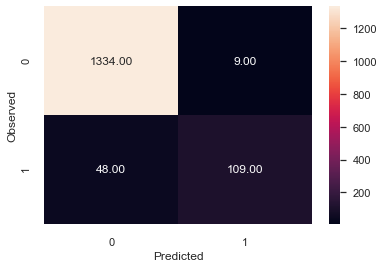

None

Recall: 0.6942675159235668

Precision: 0.923728813559322

F1 Score: 0.7927272727272728

Roc Auc Score: 0.8437830505902272


In [56]:
#Therefore final selected model is
model = LogisticRegression(random_state=42, solver='newton-cg', multi_class='ovr', dual=False,
                           C=1, class_weight=None, fit_intercept=True) 
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
print("Trainig accuracy",model.score(X_train,y_train))  
print()
print("Testing accuracy",model.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

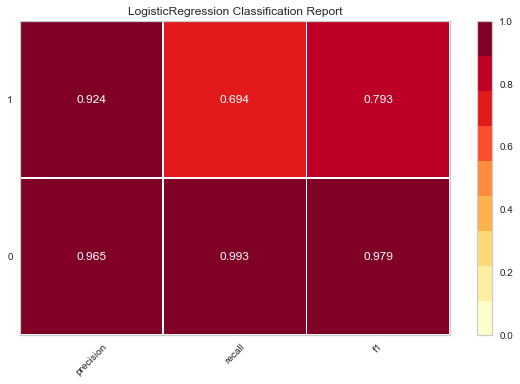

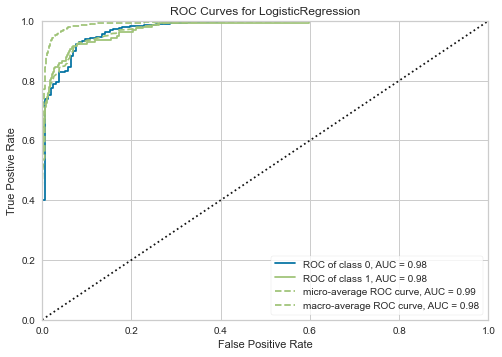

In [57]:
# Additional

from yellowbrick.classifier import ClassificationReport, ROCAUC
# Visualize model performance with yellowbrick library
viz = ClassificationReport(model)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(model)
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

#### After iterating through the model parameters, we got a slightly better precision, F1 score and Roc Auc Score compared to the default

#### We observed that with the treated data i.e. one-hot encoding, treating outliers, correcting negative experience, replace 0 age and family size with the mean, most of the parameter combination including the default performed fairly close.

## Give Business understanding of your model<a class="anchor" id='6'></a>

### Model understanding
#### And here we are with a classification report which consists of a precision, recall, f1-score & support, Also the accuracy_score and a 2*2 confusion matrix. How to determine if our model has done well…? Well first have a look at the accuracy, 96.2% accuracy is not a small thing, but we know from the data that the number of buyer’s percentage to the non-buyer percentage is very less. Hence accuracy didn’t play a big role in determining how our model performed. We got a small increase in the accuracy compared to the default parameter.

##### We will look upon the error types now:
- True Positives (TP): we correctly predicted that they will take personal loans 109
- True Negatives (TN): we correctly predicted that they will not take personal loan 1334
- False Positives (FP): we incorrectly predicted that they will take personal loan (a "Type I error") 9 Falsely predict positive Type I error
- False Negatives (FN): we incorrectly predicted that they will not take personal loans (a "Type II error") 48 Falsely predict negative Type II error
  -- In our case, the null hypothesis presents the non-buyer case, while the alternate hypothesis is the buyer one.
We must concentrate upon or reduce type II error here since we are interested in the customers who had actually bought personal loans, but our model predicted them to be a non-buyer.

#### Eventually, we can concentrate upon our confusion matrix and look for the False Negatives which in this case is 48, less the number of False Negatives, wiser our model will be or we can directly look upon the recall for ‘1’ which in this case is 69.42%. So, in this case, out of the total number of customers who actually bought personal loans our model is only able to pick 69.42% of customers of them to be correctly predicted.

#### We will also compare the area under roc curve to determine how our model performs. In this case, the area comes out to be around 84.37% which is good.

Predicted that customer who are interested in buying personal loan will be reached and provided the loan

Here the bank wants to reach people who will take personal loan but our model predicted they will not take loan i.e. less number of False Negative, if FN is high, bank would lose on prospect customers. So that the bank doesn't lose money who are willing to take personal loans. Hence Recall is the important metric.

In case of False positive, bank will lose effort to reach out to a few people but that okay because the bank thought that these people will take personal loan but they did not take. This number is quite low i.e. 9 and the precision is quite high 92.3%

After achieving the desired accuracy we can deploy the model for practical use. As in the bank now can predict who is eligible for personal loan. They can use the model for upcoming customers.

### Business understanding using EDA:

1. Personal Loan is highly correlated with Income, average spending on Credit cards, mortgage & if the customer has a certificate of deposit (CD) account with the bank.

2. The number of family members not significantly affect buying of personal loan.

3. The customer who has a certificate of deposit (CD) account with the bank seems to buy personal loans from the bank.

4. The customer who uses or doesn’t use a credit card issued by Bank doesn’t seem to affect the probability of buying a personal loan.

5. The customer who uses or doesn’t use internet banking facilities seems to not affect the probability of buying personal loans.

6. The customers who have or don’t have securities account with the bank do not affect the probability of buying a personal loan.

7. 42% of the candidates are graduated, while 30% are professional and 28% are Undergraduate.

8. Family size is fairly distributed

9. Approximately 94% of the customer doesn’t have a certificate of deposit (CD) account with the bank.

10. Around 71% of the customer doesn’t use a credit card issued by UniversalBank.

11. Around 60% of customers use internet banking facilities.

12. Around 90% of the customer doesn’t accept the personal loan offered in the last campaign.

13. Around 90% of the customer doesn’t have a securities account with the bank.

#### We can target customers that are highly educated, high income, hold credit card, have mortgage account, holds CD account for personal loan

